In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
car = pd.read_csv("/content/UserCarData.csv")
cars = car.drop(["City",'Region','State or Province','sold','Sales_ID','name'], axis = 1)
cars.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,2006,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,2010,225000,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,2007,130000,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5
5,2017,440000,45000,Petrol,Individual,Manual,First_Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5
6,2007,96000,175000,LPG,Individual,Manual,First_Owner,17.30,1061,57.50,"7.8@ 4,500(kgm@ rpm)",5
7,2001,45000,5000,Petrol,Individual,Manual,Second_Owner,16.10,796,37.00,59Nm@ 2500rpm,4
8,2011,350000,90000,Diesel,Individual,Manual,First_Owner,23.59,1364,67.10,170Nm@ 1800-2400rpm,5
9,2013,200000,169000,Diesel,Individual,Manual,First_Owner,20.00,1399,68.10,160Nm@ 2000rpm,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cars.shape

(7906, 12)

In [ ]:
cars.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [ ]:
import re

In [ ]:
res = '190Nm@ 2000rpm'.replace('.',"")
res = res.replace(",","")
a = [int(s) for s in re.findall(r'\d+' ,res)]
a

[190, 2000]

In [ ]:
torque_list = cars['torque'].to_list()
torque_rpm =[]
def extractingRPM(x):
  for item in x:
    res = item.replace('.','')
    res = res.replace(',','')
    temp = [int(s) for s in re.findall(r'\d+', res)]
    torque_rpm.append(max(temp))
extractingRPM(torque_list)
print(torque_list[:5])
print(torque_rpm[:5])



['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)', '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)']
[2000, 2500, 2700, 2750, 4500]


In [ ]:
cars['torque_rpm']= torque_rpm
cars.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,2000
1,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,2500
2,2006,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,2700


In [ ]:
#rest all the colums are having no unit so we need not to convert
cars_new = cars.drop(['torque'],axis = 1)

In [ ]:
cars_new.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_rpm
0,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,5,2000
1,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,5,2500


In [ ]:

cars_new.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_rpm
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393,3474.631419
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208,2579.612132
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,400.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,2500.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,3000.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,43639.000000


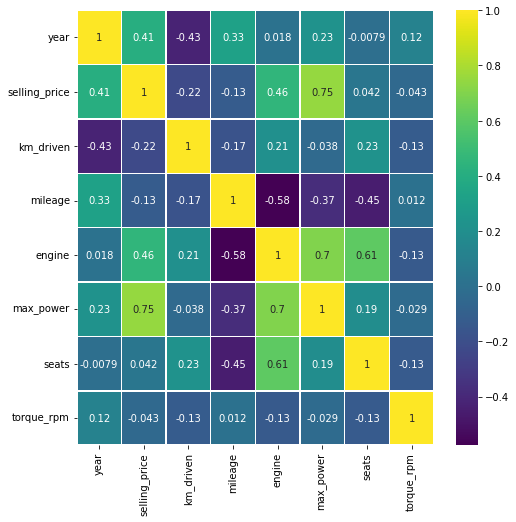

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cars_new.corr(),annot = True,cmap ='viridis',linewidths=.5)

In [ ]:
#finding categorical data points
cars_new['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [ ]:
cars_new['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark_Dealer     236
Name: seller_type, dtype: int64

In [ ]:
cars_new['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [ ]:
cars_new['owner'].value_counts()

First_Owner           5215
Second_Owner          2016
Third_Owner            510
Fourth_Above_Owner     160
Test_Drive_Car           5
Name: owner, dtype: int64

In [ ]:
# converting categorical dta into integer format

#for transmission
def ref1(x):
  if x == 'Manual':
    return 1
  else:
    return 0
cars_new['transmission'] = cars_new['transmission'].map(ref1)

In [ ]:
# for Seller type

def ref2(x):
  if x == 'Individual':
    return 1
  elif x == "Dealer":
    return 0  
  else:
    return -1
cars_new['seller_type'] = cars_new['seller_type'].map(ref2)

In [ ]:
# for Fuel type

def ref3(x):
  if x == 'Petrol':
    return 1
  elif x == "Diesel":
    return 0  
  else:
    return -1
cars_new['fuel'] = cars_new['fuel'].map(ref3)

In [ ]:
owners = pd.get_dummies(cars_new['owner'])
X = pd.concat([cars_new,owners],axis = 1)


In [ ]:
y = X['selling_price']
X = X.drop(['selling_price'], axis = 1)
X = X.drop(['owner'], axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X[:3000],y[:3000],test_size = 0.2)

In [ ]:
random_model = RandomForestRegressor(n_estimators= 300,random_state= 42, n_jobs=-1)

In [ ]:
Xtrain.head(2)

,year,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,torque_rpm,First_Owner,Fourth_Above_Owner,Second_Owner,Test_Drive_Car,Third_Owner
1898,2014,50000,1,1,1,19.7,796,46.3,5,3000,0,0,1,0,0
103,2017,37800,1,1,1,17.0,1591,121.3,5,4850,1,0,0,0,0


In [ ]:
#fitting

random_model.fit(Xtrain,ytrain)

y_pred = random_model.predict(Xtest)

#accuracy check
random_model_accuracy = round(random_model.score(Xtrain,ytrain)*100,2)
print(round(random_model_accuracy,2),'%')

99.29 %


In [ ]:
reg = LinearRegression()
reg.fit(Xtrain,ytrain)
LinearRegression(copy_X = True,fit_intercept = True,n_jobs= None ,normalize = False)


LinearRegression(normalize=False)

In [ ]:
print(round(reg.score(Xtrain,ytrain),2))

0.69


In [ ]:
print(round(reg.score(Xtest,ytest),2))

0.66


In [ ]:
# save the random forest model because it gives more accuracy as a pickle string

import pickle
daved_model = pickle.dump(random_model,open('/content/pickle/carselling.sav','wb'))